## Proyecto 4 KickOff - Sistema de Recomendación

In [ ]:
# Un **Sistema de Recomendación** es un programa o software que crea recomendaciones de productos, servicios, información o contenido a los usuarios, basado en sus preferencias y comportamientos previos (visitar, comprar, dar like, ...)
Por ejemplo, el proveedor de servicios de medios, **Netflix**, usa sistemas de referencia para recomendar películas o programas de televisión para usuarios individuales que probablemente los vean. La empresa de comercio electrónico **Amazon** usa sistemas de recomendación para predecir y mostrar una lista de productos que es probable que el cliente compre. El servicio de transmisión de música, **Pandora**, utiliza sistemas de recomendación de música para sus oyentes.
![](netflix.jpg)

# Algunos datos reales: En Netflix se recomiendan 2/3 de las películas vistas. En Google, las recomendaciones de noticias mejoraron la tasa de clics (CTR) en un 38%. Para Amazon, el 35% de las ventas provienen de recomendaciones.
Mediante análisis de datos y aprendizaje automático el sistema determina qué productos (items) son más relevantes para un usuario en particular y recomendarlos en consecuencia.

#Hay principalmente 3 tipos de sistemas de recomendación:
1. los basados en contenido (**Content-based**), que utilizan la descripción/atributos de los productos para hacer recomendaciones por su similitud.
![](Content-based-filtering-vs-Collaborative-filtering-Source.png)
2. los sistemas de filtrado colaborativo por usuario (**User-based collaborative filtering**), que buscan usuarios similares (en su cesta de compra) y listan sus items preferidos (comprados).
3. los sistemas de filtrado colaborativo por producto (**Item-Based Collaborative Filtering**), que buscan productos similares (en su historial de compradores).
![](itemVSuser.jpg)
Los sistemas de recomendación se utilizan en sitios web de comercio electrónico (Amazon) y en plataformas de entretenimiento en línea (YouTube) y redes sociales (Instagram). Su objetivo es hacer fácil al usuario encontrar lo que más le puede interesar.

# Ejercicio:
![image.png](attachment:image.png)

***
# Model-based
En realidad, hay un dos tipos más de sistemas de recomendación que se usan menos y son más difíciles de implementar: híbridos y model-based:
- La falta de diversidad en las recomendaciones se resuelve mediante sistemas **híbridos** (collaborative filtering + content-based) que suman las recomendaciones de los dos sistemas.
- En los **sistemas de recomendación model-based**, el modelo matemático se entrena con datos históricos de interacciones de los usuarios con los elementos para encontrar patrones y relaciones entre ellos. Estos sistemas son capaces de manejar grandes conjuntos de datos y hacer recomendaciones personalizadas para usuarios individuales en función de sus preferencias y comportamientos pasados, **sin tener en cuenta la existencia de otros productos y de otros usuarios de la plataforma**.
![](model-hybrid.png)
***

In [ ]:
# Proyecto 4
La empresa XYZ se dedica a la fabricación y venta en línea de productos para regalos en cualquier ocasión. Está buscando un Data Scientist para implementar un plan estratégico con el que impulsar las ventas entre sus clientes actuales. En el proceso de selección del que tú eres un candidato, se propone la siguiente prueba técnica: Desarrollar un análisis estadístico para identificar los clientes más potenciales, los productos más consumidos y los meses de mayor frecuencia de compra. Construir un sistema de recomendación de productos según el historial del cliente. Y crear un modelo de detección de bundles.

# Objetivos (Especificaciones del desarrollo)
1. Informe de contexto del dataset: productos más vendidos, países con más ventas, horarios pico, etc.
2. Representar gráficamente productos y beneficios por compra.
![](scatter-ventas.png)

2. Obtener 10 productos recomendados (con su descripción) para los usuarios de una plataforma de comercio electrónico.
3. Obtener recomendaciones de **bundles** definidos por los patrones de compra de los usuarios.

# DataSet: Diisponemos del fichero OnlineRetail.csv (datos anonimizados) que contiene las compras realizadas por los usuarios, así como los parámetros esenciales del producto adquirido.

# Hints: Explorar los datos y realizar **limpieza de registros incompletos**. Visualizar valores faltantes con la librería **missingno**
![](graph-missingno.png)

In [18]:
# Importar librerías:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Matplotlib usa todo el ancho de pantalla:
plt.rcParams.update({'figure.figsize': (10, 7), 'figure.dpi': 120})
import seaborn as sns
from math import sqrt

In [2]:
# Cargar dataset
df = pd.read_csv('OnlineRetail.csv',  encoding='ISO-8859-1')
#df = pd.read_csv("OnlineRetail.csv", sep = ",")

In [3]:
df.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [4]:
df.shape

(541909, 8)

In [4]:
df.info

<bound method DataFrame.info of        InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

            InvoiceDate  UnitPrice  Custome

In [5]:
df.count()

InvoiceNo      541909
StockCode      541909
Description    540455
Quantity       541909
InvoiceDate    541909
UnitPrice      541909
CustomerID     406829
Country        541909
dtype: int64

In [6]:
df.dtypes

InvoiceNo       object
StockCode       object
Description     object
Quantity         int64
InvoiceDate     object
UnitPrice      float64
CustomerID     float64
Country         object
dtype: object

In [7]:
type(df)

pandas.core.frame.DataFrame

In [8]:
df.shape[1]

8

In [3]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [4]:
# Eliminamos colunmas innecesarias
df_2 = df.drop(['Description', 'CustomerID', 'InvoiceNo', 'InvoiceDate'], axis=1)
# Verificamos que no esten las columnas eliminadas
df_2.columns

Index(['StockCode', 'Quantity', 'UnitPrice', 'Country'], dtype='object')

In [5]:
# ahora vamos a ver si hay valores faltantes
df_2.isnull().sum()

StockCode    0
Quantity     0
UnitPrice    0
Country      0
dtype: int64

In [8]:
df_2.Country.value_counts()  

United Kingdom          495478
Germany                   9495
France                    8557
EIRE                      8196
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               2002
Portugal                  1519
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Unspecified                446
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
Israel                     297
USA                        291
Hong Kong                  288
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebanon 

In [6]:
paises = ['Germany', 'France', 'EIRE', 'Netherlands', 'Belgium', 'Switzerland', 'Portugal', 'Australia', 'Norway', 'Italy']             
data_filt = df_2[df_2['Country'].isin(paises)]
data_filt

,StockCode,Quantity,UnitPrice,Country
26,22728,24,3.75,France
27,22727,24,3.75,France
28,22726,12,3.75,France
29,21724,12,0.85,France
30,21883,24,0.65,France
...,...,...,...,...
541904,22613,12,0.85,France
541905,22899,6,2.10,France
541906,23254,4,4.15,France
541907,23255,4,4.15,France


In [7]:
data_filt.sort_values(by=['Country'])

,StockCode,Quantity,UnitPrice,Country
170899,22990,-100,4.25,Australia
344586,21623,2,9.95,Australia
344585,48138,2,8.25,Australia
344584,20750,2,7.95,Australia
344583,20749,2,7.95,Australia
...,...,...,...,...
63095,22973,12,1.65,Switzerland
63096,22975,12,1.25,Switzerland
63097,21195,48,0.65,Switzerland
373249,22326,-1,2.95,Switzerland


In [12]:
data_filt.describe()

,Quantity,UnitPrice
count,37357.000000,37357.000000
mean,20.109993,4.751246
std,45.620534,49.211223
min,-480.000000,0.000000
25%,4.000000,1.250000
50%,10.000000,1.950000
75%,16.000000,3.750000
max,2400.000000,4161.060000


In [8]:
data_filt.shape

(37357, 4)

In [9]:
data_filt.nunique()

StockCode    2667
Quantity      131
UnitPrice     174
Country        10
dtype: int64

In [17]:
data_filt.Country.value_counts(normalize=True)

Germany        0.254169
France         0.229060
EIRE           0.219397
Netherlands    0.063469
Belgium        0.055385
Switzerland    0.053591
Portugal       0.040662
Australia      0.033702
Norway         0.029071
Italy          0.021495
Name: Country, dtype: float64

In [18]:
data_filt.duplicated()

26        False
27        False
28        False
29        False
30        False
          ...  
541904     True
541905     True
541906     True
541907     True
541908     True
Length: 37357, dtype: bool

In [10]:
data_filt.isnull().sum()

StockCode    0
Quantity     0
UnitPrice    0
Country      0
dtype: int64

In [11]:
data_filt.columns

Index(['StockCode', 'Quantity', 'UnitPrice', 'Country'], dtype='object')

In [21]:
# Eliminamos colunmas innecesarias
data_filt = data_filt.drop(['InvoiceNo', 'Description', 'InvoiceDate', 'CustomerID'], axis=1)
# Verificamos que no esten las columnas eliminadas
data_filt.columns

Index(['Quantity', 'UnitPrice', 'Country'], dtype='object')

In [12]:
# Grabamos el resultado como CSV separado por comas
data_filt.to_csv('reducido_P4.csv', index=False)

In [13]:
df_3 = pd.read_csv("reducido_P4.csv")
df_3.head(3)

,StockCode,Quantity,UnitPrice,Country
0,22728,24,3.75,France
1,22727,24,3.75,France
2,22726,12,3.75,France


In [14]:
df_3 = df_3.drop(['StockCode'], axis=1)
df_3

,Quantity,UnitPrice,Country
0,24,3.75,France
1,24,3.75,France
2,12,3.75,France
3,12,0.85,France
4,24,0.65,France
...,...,...,...
37352,12,0.85,France
37353,6,2.10,France
37354,4,4.15,France
37355,4,4.15,France


## Gráficos

([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, 'France'),
  Text(1, 0, 'Australia'),
  Text(2, 0, 'Netherlands'),
  Text(3, 0, 'Germany'),
  Text(4, 0, 'Norway'),
  Text(5, 0, 'EIRE'),
  Text(6, 0, 'Switzerland'),
  Text(7, 0, 'Portugal'),
  Text(8, 0, 'Italy'),
  Text(9, 0, 'Belgium')])

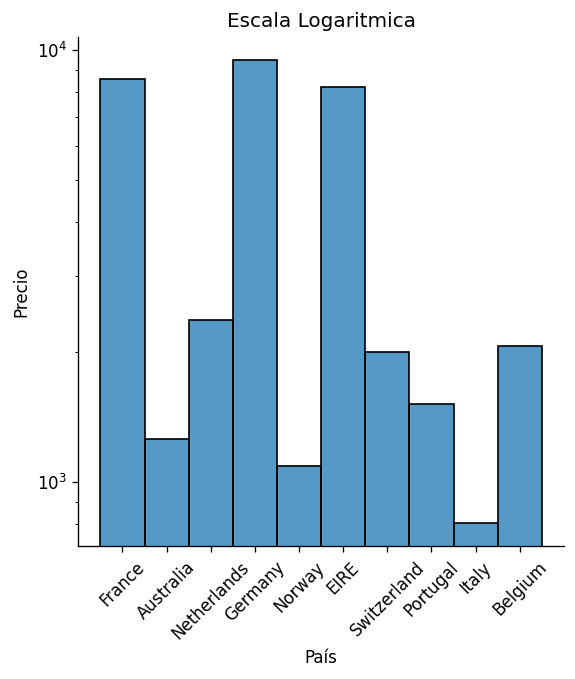

In [19]:
figure = sns.displot(data=df_3, x='Country', height=5 ) 
plt.title("Escala Logaritmica")
plt.xlabel("País")
plt.ylabel("Precio")
plt.yscale('log')
# Etiquetas del eje x inclinadas:
plt.xticks(rotation=45)

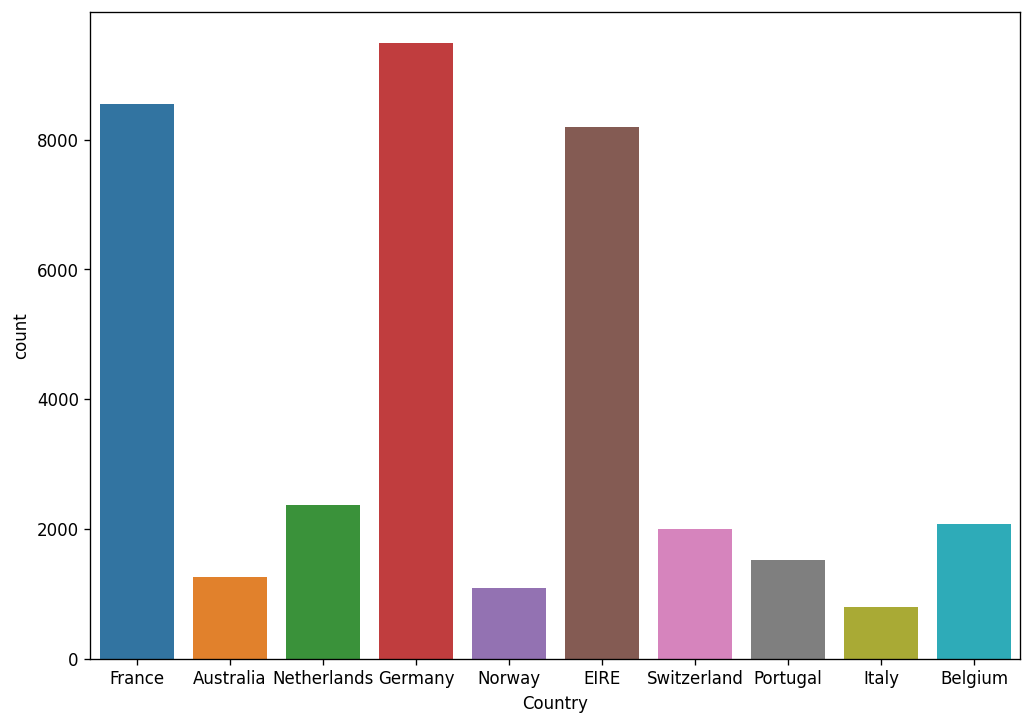

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

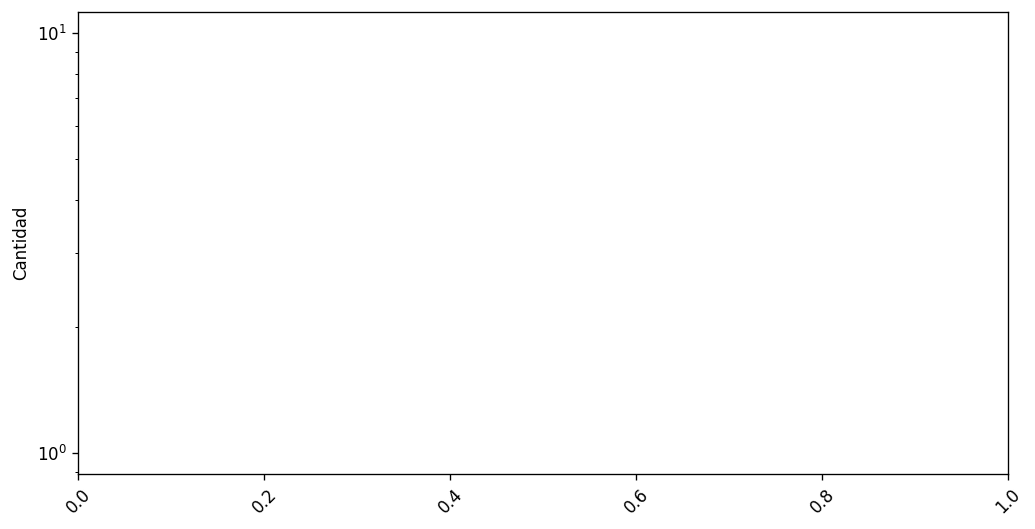

In [23]:
plt.figure(figsize=(10,7))
sns.countplot(data=df_3,x='Country')
plt.show()
plt.ylabel("Cantidad")
plt.yscale('log')
# Etiquetas del eje x inclinadas:
plt.xticks(rotation=45)

In [24]:
paises_2 = ['Germany', 'France', 'EIRE', 'Netherlands', 'Belgium', 'Switzerland', 'Portugal', 'Australia', 'Norway', 'Italy']             
data_filt_2 = df_3[df_3['Country'].isin(paises)]
data_filt_2

,Quantity,UnitPrice,Country
0,24,3.75,France
1,24,3.75,France
2,12,3.75,France
3,12,0.85,France
4,24,0.65,France
...,...,...,...
37352,12,0.85,France
37353,6,2.10,France
37354,4,4.15,France
37355,4,4.15,France


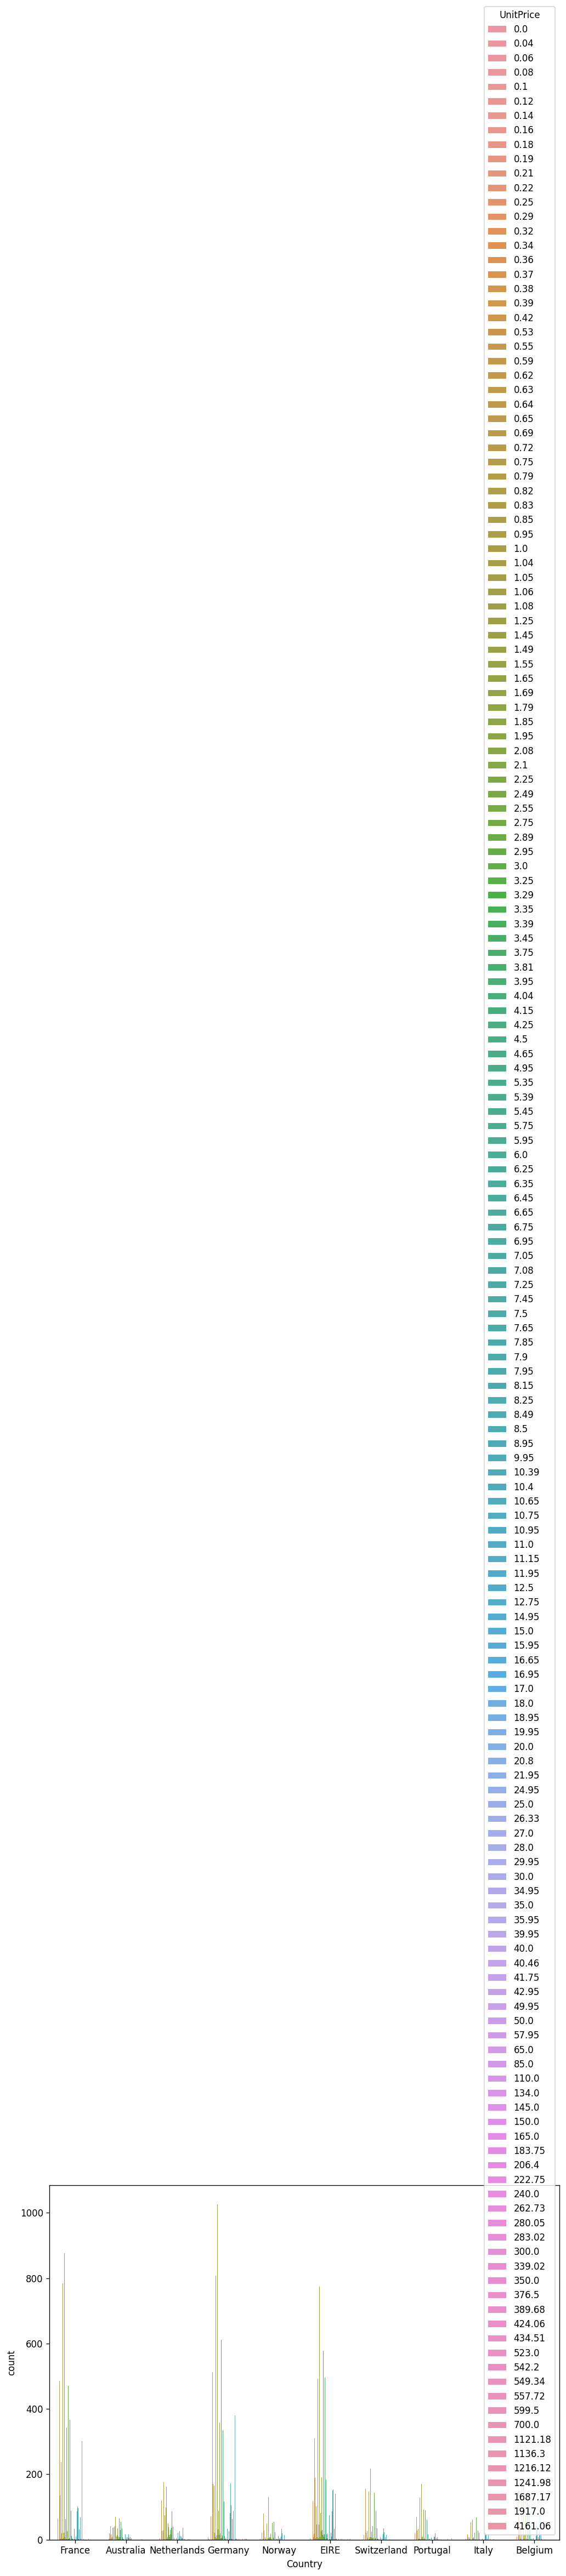

(array([0. , 0.2, 0.4, 0.6, 0.8, 1. ]),
 [Text(0.0, 0, '0.0'),
  Text(0.2, 0, '0.2'),
  Text(0.4, 0, '0.4'),
  Text(0.6000000000000001, 0, '0.6'),
  Text(0.8, 0, '0.8'),
  Text(1.0, 0, '1.0')])

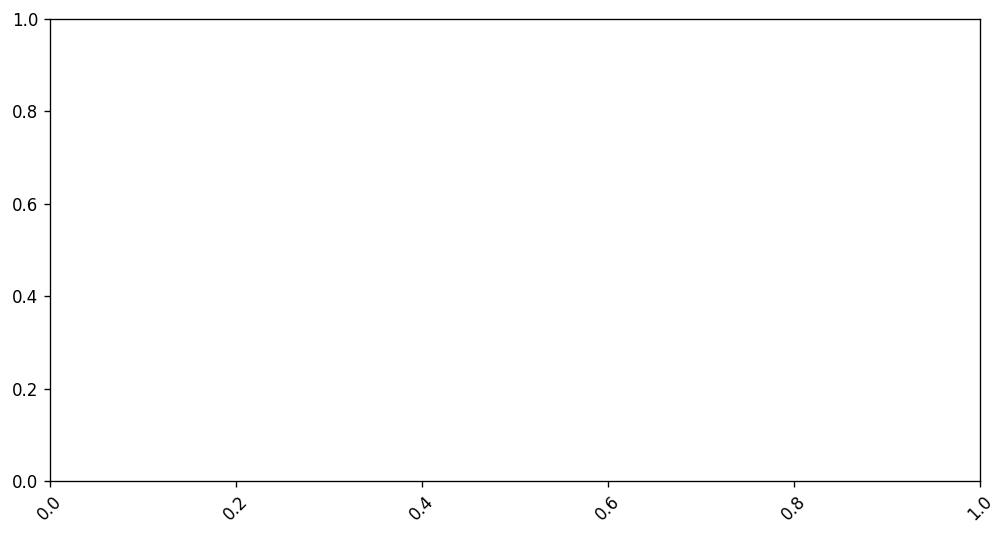

In [27]:
plt.figure(figsize=(10,7))
# Con hue, podemos agrupar por categorías
sns.countplot(data=data_filt_2,x='Country', hue='UnitPrice')
plt.show()
plt.xticks(rotation=45)

<AxesSubplot: xlabel='Country', ylabel='count'>

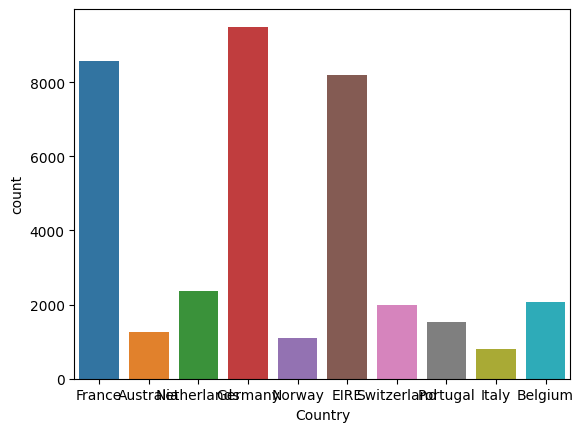

In [39]:
# Gráfico de barras de la proveniencia geografica
sns.countplot(x='Country', data=data_filt_2)

<AxesSubplot: xlabel='Quantity', ylabel='count'>

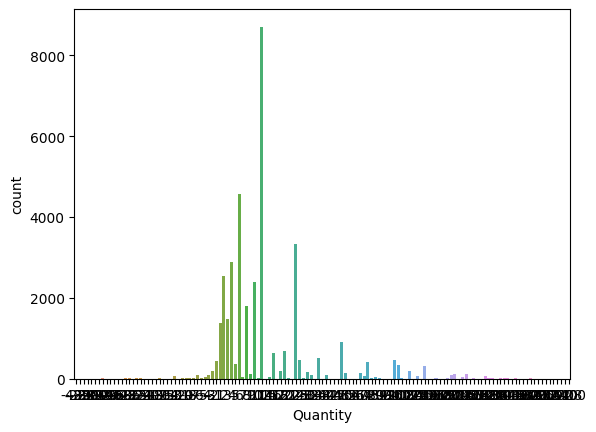

In [42]:
# Gráfico de barras de los rango de precios
sns.countplot(x='Quantity', data=data_filt_2)

<AxesSubplot: xlabel='UnitPrice', ylabel='count'>

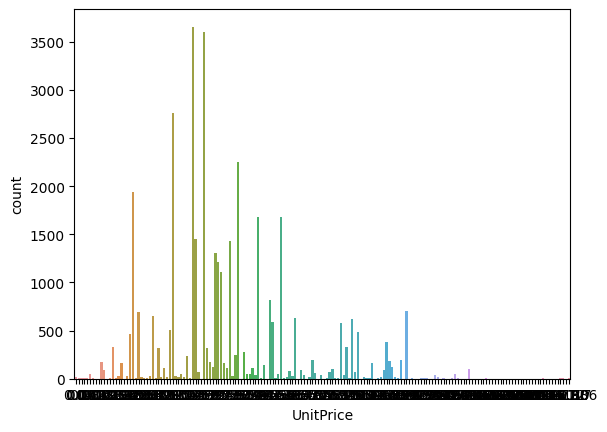

In [44]:
sns.countplot(x='UnitPrice', data=data_filt_2)

<AxesSubplot: ylabel='Quantity'>

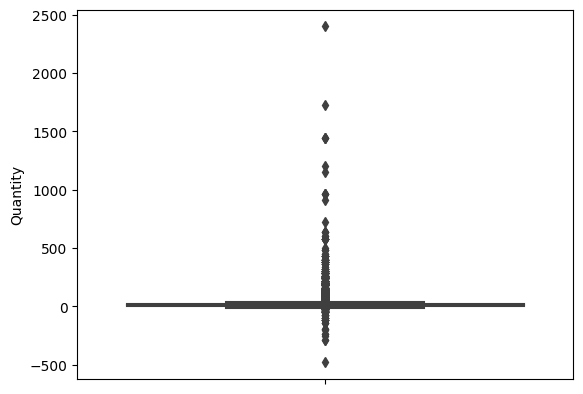

In [43]:
# Boxplot de la variable success
sns.boxplot(y = 'Quantity', data = data_filt_2)

#x:variable categórica e y:variable númerica 

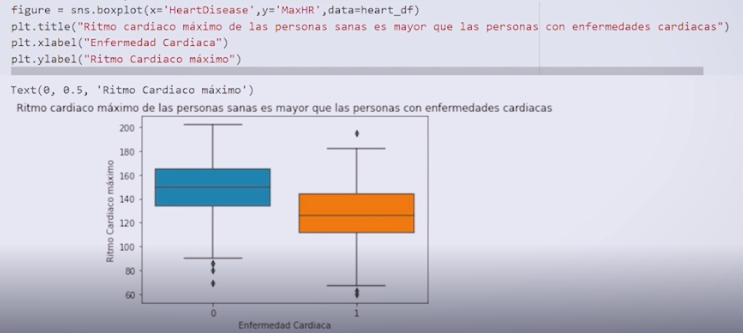

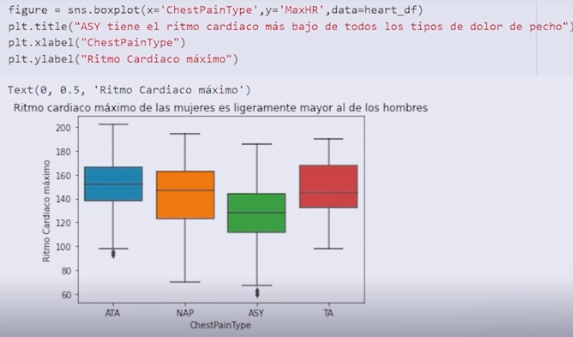

C:\Users\n_sar\AppData\Local\Temp\ipykernel_2000\1490362373.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(data_filt_2['UnitPrice'])


<AxesSubplot: xlabel='UnitPrice', ylabel='Density'>

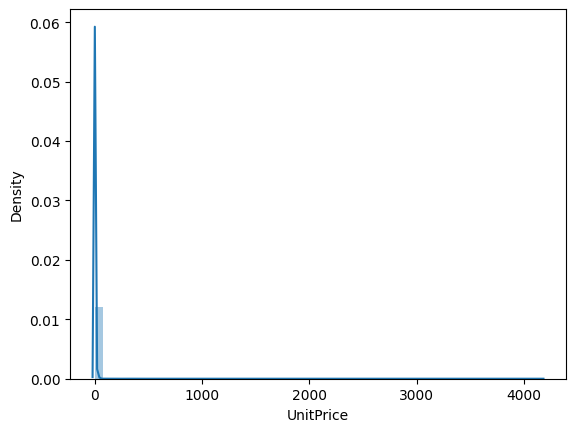

In [45]:
# Histograma
sns.distplot(data_filt_2['UnitPrice'])

In [49]:
sns.displot(data=data_filt_2, x='Country', y='UnitPrice')

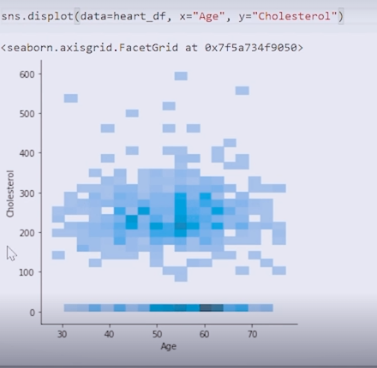

In [ ]:
sns.countplot(x='UnitPrice', data=df_2)    

In [20]:
#Pairplot del dataset!
sns.pairplot(df_2)

In [ ]:
# Scatter plot mas linea, para identificar mejor las tendencias
sns.regplot(x='alcohol', y="UnitPrice", data=df_2)

C:\Users\n_sar\AppData\Local\Temp\ipykernel_20892\1165628841.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<AxesSubplot: >

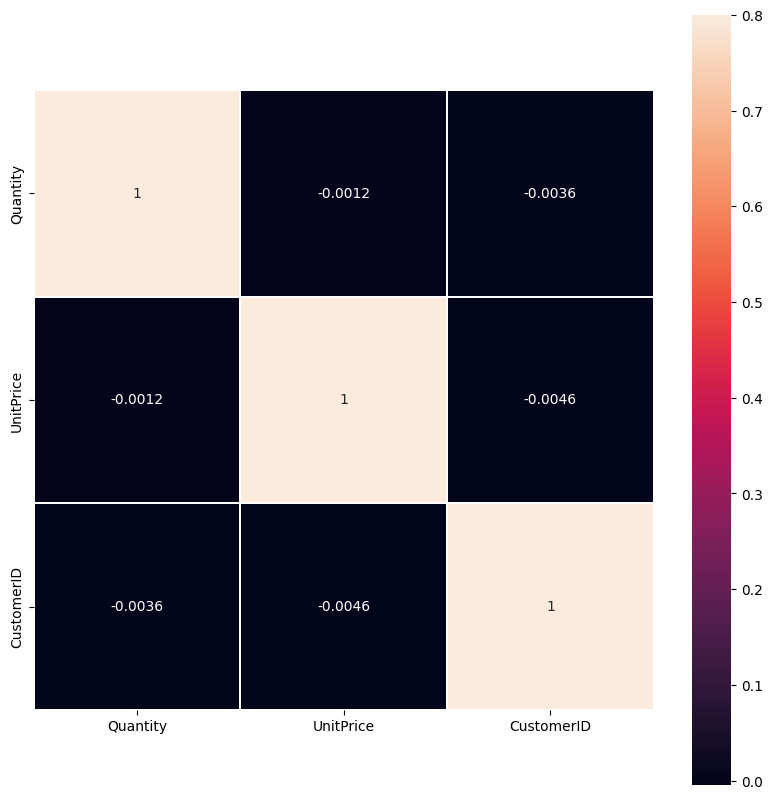

In [35]:
# Mapa de correlaciones
corr = df.corr()
plt.figure(figsize=(10, 10))
sns.heatmap(corr, vmax=.8, linewidths=0.01, square=True,annot=True)

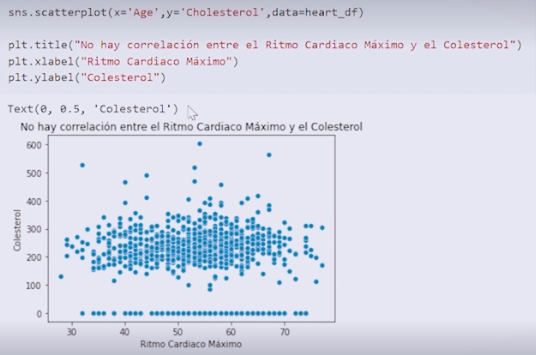

In [ ]:
titles=' '.join(df_2.title).lower()

plt.figure(figsize=(15,10))
wordcloud = WordCloud(collocations=True, max_words=500 ).generate(titles)
plt.imshow(wordcloud)
plt.axis("off")
plt.show()

2. Construir un mapa que muestre número de compras totales por país y otro con número de compras relativas (per capita) por país.

![](mapa.png)

3. Analizar los horarios y calendarios de compra, mediante histogramas y estacionalidad.

![](ventas-por-meses.png)
![](pieChart.png)

4. Crear la **Customer-Item Matrix** mediante el método df.pivot_table

![](pivot-table.png)

5. Crear la **User to User Similarity Matrix** mediante la **distancia del coseno** con la librería sklearn

![](An-example-of-user-similarity-matrix-of-k-RRI.png)

6. Obtener las 10 recomendaciones de tipo **filtrado colaborativo por usuario**.

7. Obtener las 10 recomendaciones de tipo **filtrado colaborativo por producto** creando previamente la **Item to Item Similarity Matrix**.

8. Obtener las 10 recomendaciones de tipo **basado en contenido** utilizando métricas de texto (Levenshtein o vectorización TF-IDF)

9. Realizar un **market basket analysis** para detectar **bundles** (packs) de productos. Algoritmos de clusterización como K-means podrían detectar los bundles más frecuentes.